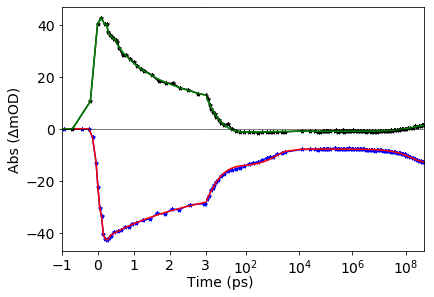

In [52]:
# Plotting a time-resolved data in Linear-Logarithmic time scale
# Data shown here belongs to time-resolved Vis-Vis Spectroscopy of PYP.

# declarations

import scipy.io
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

#variables
lwidth_zeroline=0.5 # this is the line width of horizontal line at y=0. 
fs = 14 #fontsize 
m = 3 #point in time where log plot starts.
mat = scipy.io.loadmat('tracedataVIS.mat') # result is in array data type.
# mat file to import where trace files has two columns; time axis and absorbance. 
# Headers of those individual trace data can be used in slicing as below.

d_446 = (mat['d_446'])  # Experimental data of 446 nm trace. 
f_446 = (mat['f_446'])  # Fit data of 446 nm trace. 
d_380 = (mat['d_380'])  # Experimental data of 380 nm trace. 
f_380 = (mat['f_380'])  # Fit data of 380 nm trace. 

#slicing the data for plotting.

x1=d_446[:, 0]
y1=d_446[:, 1]
x2=f_446[:, 0]
y2=f_446[:, 1]
x3=d_380[:, 0]
y3=d_380[:, 1]
x4=f_380[:, 0]
y4=f_380[:, 1]

# PLotting the Logarithmic Part
fig = plt.figure(figsize=(6.5,4.5))
axMain = plt.subplot(111)

axMain.plot(x1,y1, color ='blue', linestyle='solid', marker='*', markersize=4)
axMain.plot(x2,y2, color ='red', linestyle='solid', markersize=4)

axMain.plot(x3,y3, color ='black', linestyle='solid', marker='*', markersize=4)
axMain.plot(x4,y4, color ='green', linestyle='solid', markersize=4)

plt.axhline(y=0.0, color='k', linestyle='-',linewidth=lwidth_zeroline) # plot horizontal line at y=0. 

axMain.set_xscale('log')
axMain.set_xlim((m, 500000000))

axMain.spines['left'].set_visible(False)
axMain.yaxis.set_ticks_position('right')
axMain.yaxis.set_visible(False)
plt.xticks(fontsize=fs)


# Plotting the Linear Part.
divider = make_axes_locatable(axMain)
axLin = divider.append_axes("left", size=2, pad=0, sharey=axMain)
axLin.set_xscale('linear')
axLin.set_xlim((-1, m))


axLin.plot(x1,y1, color ='blue', linestyle='solid', 
marker='*', markersize=4)
axLin.plot(x2,y2, color ='red', linestyle='solid', markersize=4)

axLin.plot(x3,y3, color ='black', linestyle='solid', 
marker='*', markersize=4)
axLin.plot(x4,y4, color ='green', linestyle='solid', markersize=4)

plt.axhline(y=0.0, color='k', linestyle='-',linewidth=lwidth_zeroline) # plot horizontal line at y=0. 

axLin.spines['right'].set_visible(False)
axLin.yaxis.set_ticks_position('left')
plt.setp(axLin.get_xticklabels(), visible=True)
axLin.xaxis.set_label_coords(1.1, -0.1)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)

# Displaying Labels and Titles.
plt.xlabel('Time (ps)', fontsize=fs)
plt.ylabel('Abs (∆mOD)', fontsize=fs)
plt.savefig('Linlogtrace.pdf')
plt.show()